#Developer job satisfaction analysis

##Section 1: Business Understanding

We will be using Stack Overflow data from 2024 survey of developers, which is covering many topics including details about their personas, working conditions they operate in, languages they work with, as well as things they like and do not like about various aspects of their work situation. The survey also asks to answer on a scale of 0 to 10 how satisfied the respondents are in their current professional developer role. There are 65,000 respondents of different background and experience, and more than 100 questions in the survey.

The project will answer the following questions:

1. What factors drive the high job satisfaction among developers;
2. Whether more experienced developers are more satisfied with their job;
3. Whether a decision tree classifier would perform well in classifying each of respondents to the job satisfaction score;
4. Whether the model can be used to classify respondents into age groups based on their answers in the survey (based on earlier selected columns).

The analysis follows CRISP-DM process- the main steps are outlines below.

Let's install all the necessary libraries, which we will be using in the analysis. 

In [225]:
#import function is used to load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

##Section 2: Data Understanding

###Gather data

For the analysis we are selecting only few columns from the survey, as we do not want to overcomplicate the analysis and the model. 
The following columns have been selected: 
age, remote or in office work, years of coding, as well as respondents’ scoring of the following work experience related attribute as they correspond to their job satisfaction: whether they have interactions outside of the office, whether work with AI, whether they drive strategy for the team, whether they build architecture, and whether they work with top quality hardware.

##Section 3: Data Preparation

The respondents with missing answers for the above questions have been removed from the data. Out of 65,437 respondents 36,311 have not answered the question about the job satisfaction in the current role, additionally 1,101 respondents have not answered some of the other questions that we have picked for the analysis. Total population of respondents taken into analysis is 28,025. 

Removing respondents with missing answers does not bias or alter our results, because we have no reason to think that people who have not provided answers would have belonged to a particular category in terms of job satisfaction. Likely NaN answers were provided randomly when respondents did not feel like answering those questions. To be able to model job satisfaction scores we need to have the exact answers to this question, if we fill the missing values with average scores instead, that might misrepresent the results.

Additionally, answers about remote or in-office work conditions have been changed from string to numerical categories: 1-in office, 2-hybrid, 3- remote. Similarly for the question about working with AI, the numerical answers have been assigned as 0 - not working and not planning to work with AI, 1- working with AI. This way we can include these questions as variable to the model.

In [226]:
#Let's load the data -the function creates a dataframe out of csv extracted data
df = pd.read_csv('.//Survey_data2.csv') 

###Assess data

In [227]:
#the function checks how much data we have - rows and columns. The number is in line with our expectation.
df.shape

(28025, 9)

In [228]:
#the function shows basic analytics of the data, such as mean, standard deviation, min and max values per column. Nothing unusual jumps to our attention.
df.describe()

,Age,RemoteWork,YearsCode,Knowledge_1,JobSatPoints_1,AISelect,JobSat,JobSatPoints_6,JobSatPoints_8
count,28025.000000,28025.000000,28025.000000,28025.000000,28025.000000,28025.000000,28025.000000,28025.000000,28025.000000
mean,34.589117,1.798715,15.308368,1.081677,19.229367,0.623550,6.938805,25.250961,21.055794
std,9.933952,0.724691,9.881138,0.949631,26.132250,0.484504,2.083934,27.134487,26.267727
min,18.000000,1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,8.000000,1.000000,0.000000,0.000000,6.000000,5.000000,0.000000
50%,30.000000,2.000000,13.000000,1.000000,10.000000,1.000000,7.000000,20.000000,10.000000
75%,40.000000,2.000000,20.000000,2.000000,25.000000,1.000000,8.000000,30.000000,30.000000
max,65.000000,3.000000,55.000000,2.000000,100.000000,1.000000,10.000000,100.000000,100.000000


In [229]:
#the function shows the first five rows of data. This looks in line with our exxpectation.
df.head()

,Age,RemoteWork,YearsCode,Knowledge_1,JobSatPoints_1,AISelect,JobSat,JobSatPoints_6,JobSatPoints_8
0,40,1,20.0,2,50.0,1,8,25.0,0.0
1,40,2,20.0,2,0.0,0,8,30.0,0.0
2,50,2,31.0,2,0.0,0,5,0.0,0.0
3,30,2,12.0,1,10.0,1,10,60.0,10.0
4,30,2,5.0,2,90.0,1,6,100.0,90.0


In [230]:
#the function shows names of the columns, count per each column and the data types. 
#We can see that all columns have the same number of data points and are either integer or float data types, 
#which is what we would like to have for the model.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28025 entries, 0 to 28024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             28025 non-null  int64  
 1   RemoteWork      28025 non-null  int64  
 2   YearsCode       28025 non-null  float64
 3   Knowledge_1     28025 non-null  int64  
 4   JobSatPoints_1  28025 non-null  float64
 5   AISelect        28025 non-null  int64  
 6   JobSat          28025 non-null  int64  
 7   JobSatPoints_6  28025 non-null  float64
 8   JobSatPoints_8  28025 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.9 MB


###Analyse

Let's start preparing inputs for the model, as well as creating and training the model

In [231]:
#here we assign the Job Satisfaction column as y variable
y = df['JobSat']

Let's see what's the distribution of job satisfaction scores

<Axes: >

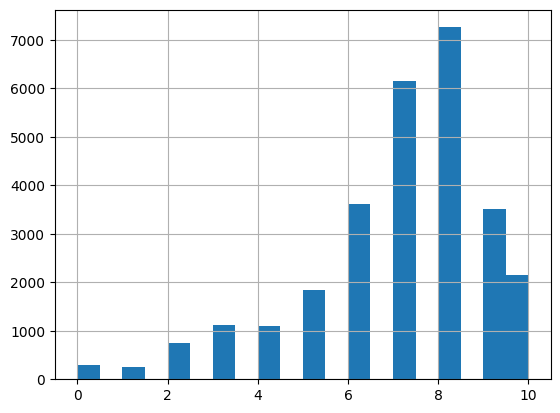

In [232]:
#the function builds a histogram for y variable. 
#We can observe that most developers are mostly satisfied with the jobs - the distribution of responses is left-skewed, with the mode at score 8. 
y.hist(bins=20)

In [233]:
#the function creates a dataframe with independent variables by removing the dependent one.
X = df.drop('JobSat',axis=1)

Let's check how the variables are correlated among themselves and with Job satisfaction variable that we want to predict

In [234]:
#here we create a correlation matrix
corr_matrix = df.corr()

In [235]:
#here we prepare a summary of correlations between Job satisfaction variable and the rest of variables.
corr_matrix["JobSat"].sort_values(ascending=False)

JobSat            1.000000
Knowledge_1       0.146976
YearsCode         0.097195
JobSatPoints_1    0.094624
Age               0.070738
JobSatPoints_8    0.059057
JobSatPoints_6    0.051177
AISelect          0.022845
RemoteWork       -0.071433
Name: JobSat, dtype: float64

##Question 1:	What factors drive the high job satisfaction among developers.

To answer this let's visualise a heatmap of correlations - blue indicates low correlation and red - high correlation.


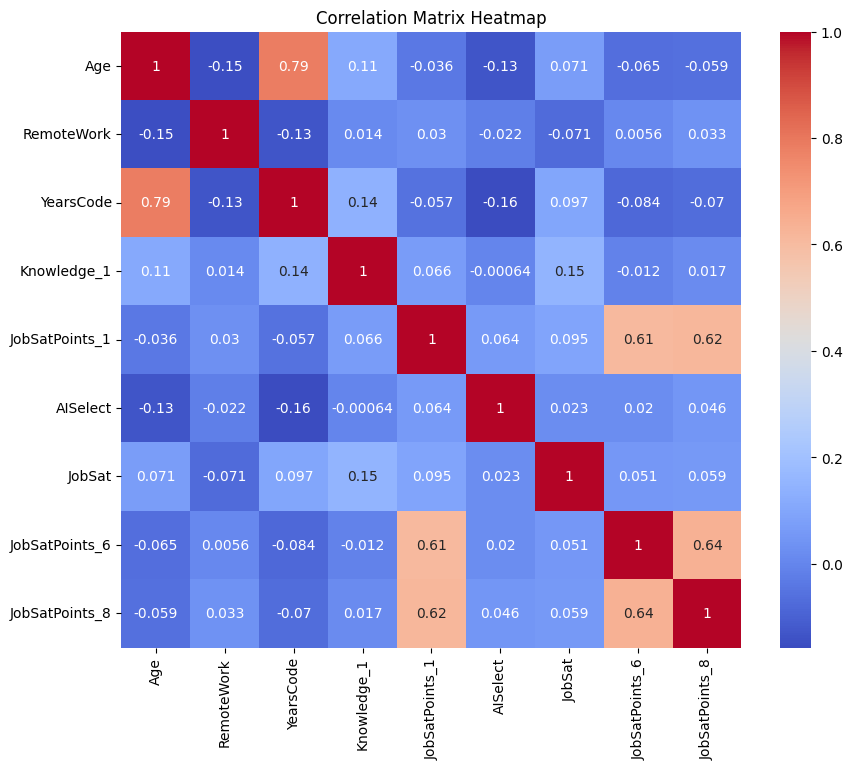

In [236]:
#Below functions are plotting the heatmap, adding the title and visualising it.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Among the selected attributes none turned out to be highly correlated with the job satisfaction scores, which means that the selected columns might not be representative of the job satisfaction among developers. 

Let's see the dispersion of independent variables, so we could understand better what data we have.
We can see that population of respondents is mainly young with a mode at 30 years of age and 5-10 years of experience. Job satisfaction questions are skewed to the right, which is opposite to the distribution of answers for the overall job satisfaction, which is skewed to the left.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RemoteWork'}>,
        <Axes: title={'center': 'YearsCode'}>],
       [<Axes: title={'center': 'Knowledge_1'}>,
        <Axes: title={'center': 'JobSatPoints_1'}>,
        <Axes: title={'center': 'AISelect'}>],
       [<Axes: title={'center': 'JobSatPoints_6'}>,
        <Axes: title={'center': 'JobSatPoints_8'}>, <Axes: >]],
      dtype=object)

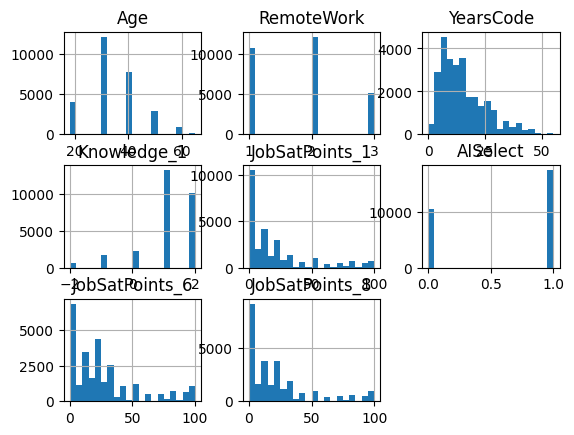

In [237]:
#the function creates histograms for each variable
X.hist(bins=20)

##Question 2: Whether more experienced developers are more satisfied with their job.

To answer this question we will visualise a boxplot with Years of coding vs Job satisfuction answers.

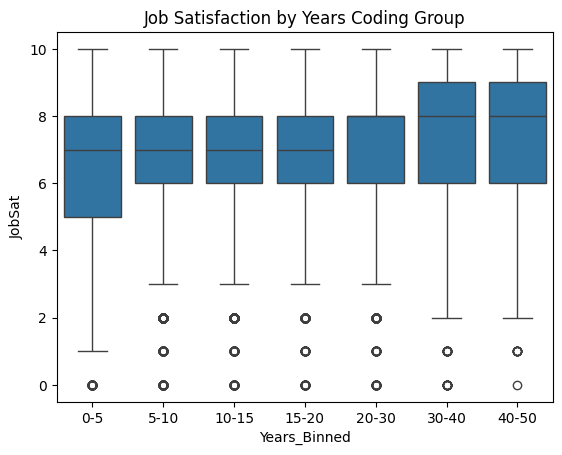

In [238]:
#the function splits "YearsCode" into bins for better visualisation
df['Years_Binned'] = pd.cut(df['YearsCode'], bins=[0,5,10,15,20,30,40,50], labels=['0-5','5-10','10-15','15-20','20-30','30-40','40-50'])
#here we creat and plot a boxplot of years coding and job satisfaction
sns.boxplot(x='Years_Binned', y='JobSat', data=df)
plt.title('Job Satisfaction by Years Coding Group')
plt.show()

We can see that respondents with 30 to 50 years of experience have provided higher job satisfaction scores in their answers, than respondents wih shorter work experience. This maybe connected with the fact that they have higher salaries and overall better work conditions, the data of which was not available in this year’s survey.

##Section 4: Data Modelling

###Model and Visualise

In [239]:
#this function splits data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y)

Let's add a function, which will create and fit the decision tree model, as we will need to perform this task several times.

In [240]:
#the function takes x and y training sets and trains a decision tree model on them 
def create_decision_tree(X_train, y_train, plot=True):
    '''
    returns a fitted model, which could be used for predictions
    inputs: X and Y training datasets
    outputs: model: a decision tree classifier model, trained based on X and Y training sets
    '''
    #we assign the output of the classifier to a model parameter    
    model = DecisionTreeClassifier(max_depth=3, random_state=13)
    #we train the model on a training set
    model.fit(X_train, y_train)
    #if plot of the decision tree is requested the below function will plot it
    if plot:
        plot_tree(model, filled=True)
    return model

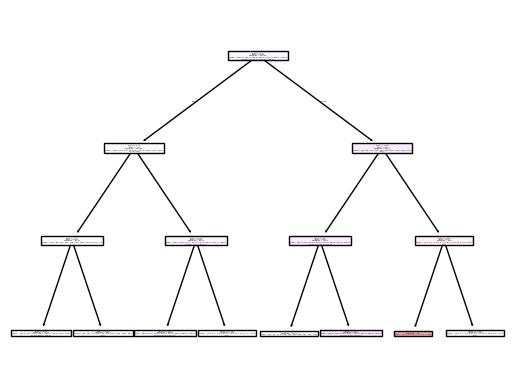

In [241]:
#the output of the function is assigned to the model variable
model = create_decision_tree(X_train,y_train)

###Section 5: Evaluate the Results

Let's create a function, which will calculate the predicted values based on the earlier model, as well as calculate accuracy scores, mse nd rmse. The function is useful as we perfrom this task several times.

##Question 3:	Whether a decision tree classifier would perform well in classifying each of respondents to the job satisfaction score they assigned to themselves.

To answer the question we classified the respondents into 10 job satisfaction categories and trained and ran a decision tree classifier model on their answers.

In [242]:
def get_prediction_accuracy(model,x,y):
    '''
    returns model accuracy measures, such as accuracy score, mse and rmse
    inputs: model, x and y datasets
    outputs: acc, mse and rmse, which are accuracy score, mean squared error and root mean squared error respectively
    '''
    y_pred = model.predict(x)
    acc = accuracy_score(y_pred, y)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return acc, mse, float(rmse)

#let's assign the output of the function to parameters acc_train, train_mse, train_rms and print them
acc_train, train_mse, train_rmse = get_prediction_accuracy(model,X_train,y_train)
print(f'{acc_train=} {train_mse=} {train_rmse=}')
acc_test, test_mse, test_rmse=get_prediction_accuracy(model,X_test,y_test)
print(f'{acc_test=} {test_mse=} {test_rmse=}')

acc_train=0.26091921210391095 train_mse=4.783518888571701 train_rmse=2.1871257139386615
acc_test=0.2618809761666904 test_mse=4.871557014414157 test_rmse=2.2071603961683794


The accuracy score for both training and test data sets turned out to be at the level of 26%, which means that the model poorly classifies the respondents to the job satisfaction categories. This might be connected with the fact that the selected attributes turned out to be not correlated with the job satisfaction scores. 
The RMSE is 2.2, which means that the model could misclassify the respondent by more than 2 points in a 10 point scale.

##Question 4: Whether the model can be used to classify respondents into age group based on their answers in the survey (based on earlier selected columns).

To answer this question let's rerun the above process, with variable y being the age.

In [243]:
# Let's consider a different scenario and reperform the above process to see how the model would perform under changed conditions. 
#New scenario- whether the model can classify repondents into age groups.
#let's import the data from csv
df2 = pd.read_csv('.//Survey_data2.csv')
#let's assign the columns to x and y
y = df2['Age']
X = df2.drop('Age',axis=1)
#let's create the split of training and testing data sets.
X_train, X_test, y_train, y_test = train_test_split(X,y)
#let's creat a model based on the earlier function
model2 = create_decision_tree(X_train, y_train,plot=False)
#let's calculate accuracy statistics based on the created function, and print them out
acc_train, train_mse, train_rmse = get_prediction_accuracy(model2,X_train,y_train)
print(f'{acc_train=} {train_mse=} {train_rmse=}')
acc_test, test_mse, test_rmse=get_prediction_accuracy(model2,X_test,y_test)
print(f'{acc_test=} {test_mse=} {test_rmse=}')

acc_train=0.6193738700161766 train_mse=50.16785612332286 train_rmse=7.082927087251631
acc_test=0.6146710432424718 test_mse=50.33281004709576 test_rmse=7.094562005303482


Surprisingly the model performed better predicting the age of respondents, with testing accuracy score of 62% and test RMSE of 7 years.
